Homework Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load data


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

Data cleaning / preparation

In [4]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [5]:
features = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms','population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']

In [7]:
df = df[features]
df.head(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [8]:
#Checking missing data
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df = df.fillna(0)

In [10]:
df.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
#new features

df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['total_rooms'] / df['households']

In [16]:
Q1 = df.ocean_proximity.mode()
Q1

0    <1H OCEAN
dtype: object

Question  1
The most frequent value is <1H OCEAN

In [17]:
numerical = list(df.dtypes[df.dtypes == 'float64'].index)
numerical

['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household']

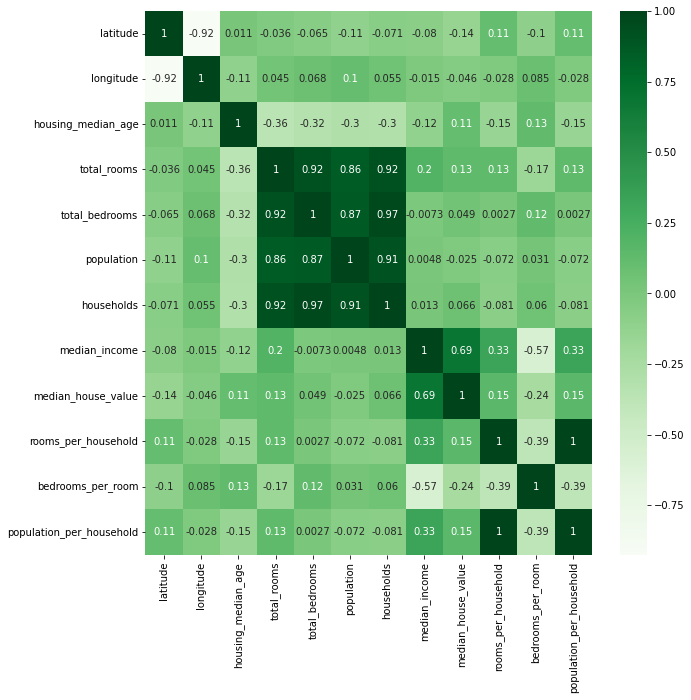

In [33]:
corr = df.corr()

plt.subplots(figsize=(10,10)) 

sns.heatmap(corr,cmap='Greens', annot=True);

Question 2 Total_bedrooms and households that give the highest correlation

In [34]:
mean_for_house_val = df['median_house_value'].mean()
mean_for_house_val

206855.81690891474

In [36]:
df['above_average'] = (df['median_house_value'] > mean_for_house_val).astype(int)
df.head(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,6.984127,1
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,6.238137,1
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,8.288136,1


Splitting dataset

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score

In [38]:
del df['median_house_value']

In [39]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [40]:
(len(df_train) / len(df)), (len(df_val) / len(df)), (len(df_val) / len(df))

(0.6, 0.2, 0.2)

In [41]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [42]:
df.head(3)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,0.146591,6.984127,1
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,0.155797,6.238137,1
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,0.129516,8.288136,1


In [43]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [44]:
# drop target variable
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

In [47]:
mi_score = round(mutual_info_score(df_full_train.above_average, df_full_train.ocean_proximity), 2)
mi_score

0.1

Question 3 
Mututal info score is 0.1

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score

In [49]:
train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

In [50]:
dv.get_feature_names_out()

array(['bedrooms_per_room', 'households', 'housing_median_age',
       'latitude', 'longitude', 'median_income',
       'ocean_proximity=<1H OCEAN', 'ocean_proximity=INLAND',
       'ocean_proximity=ISLAND', 'ocean_proximity=NEAR BAY',
       'ocean_proximity=NEAR OCEAN', 'population',
       'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)

In [51]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [52]:
y_train

array([1, 1, 0, ..., 1, 0, 0])

In [53]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

In [54]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [55]:
model.intercept_[0]

-0.32162117197337964

In [58]:
w = model.coef_[0]

In [59]:
dict(zip(dv.get_feature_names_out(), w))

{'bedrooms_per_room': 0.9945547595187838,
 'households': 0.004029113145434088,
 'housing_median_age': 0.037793608617481544,
 'latitude': 0.14658970298128093,
 'longitude': 0.09612117421171625,
 'median_income': 1.2248088064772151,
 'ocean_proximity=<1H OCEAN': 0.4653873572155187,
 'ocean_proximity=INLAND': -1.7018009993359098,
 'ocean_proximity=ISLAND': 0.10353030549274521,
 'ocean_proximity=NEAR BAY': 0.01414095545685495,
 'ocean_proximity=NEAR OCEAN': 0.7971212091968568,
 'population': -0.001627321671249256,
 'population_per_household': -0.005583571567540927,
 'rooms_per_household': -0.005583571567540927,
 'total_bedrooms': 0.0017061782039199595,
 'total_rooms': -0.00012948594381796382}

In [60]:
y_pred = model.predict_proba(X_val)[:, 1]

In [61]:
above_average = (y_pred >= 0.5)
above_average

array([False, False,  True, ...,  True,  True, False])

In [100]:
accuracy = accuracy_score(y_val, y_pred >= 0.5).round(2)

Accuracy is 0.84

In [95]:
features = list(df_train.columns) 

In [67]:
df_train_adj = df_train.copy()
del df_train_adj['ocean_proximity']
df_train_adj

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
0,34.43,-119.67,39.0,1467.0,381.0,1404.0,374.0,2.3681,3.922460,0.259714,3.922460
1,33.74,-118.32,24.0,6097.0,794.0,2248.0,806.0,10.1357,7.564516,0.130228,7.564516
2,39.13,-121.62,41.0,1317.0,309.0,856.0,337.0,1.6719,3.908012,0.234624,3.908012
3,34.24,-118.63,9.0,4759.0,924.0,1884.0,915.0,4.8333,5.201093,0.194158,5.201093
4,37.52,-122.30,38.0,2769.0,387.0,994.0,395.0,5.5902,7.010127,0.139762,7.010127
...,...,...,...,...,...,...,...,...,...,...,...
12379,33.79,-118.29,16.0,1867.0,571.0,951.0,498.0,3.3427,3.748996,0.305838,3.748996
12380,38.04,-121.34,16.0,3295.0,565.0,2279.0,576.0,3.6083,5.720486,0.171472,5.720486
12381,32.74,-116.99,18.0,3341.0,611.0,1952.0,602.0,3.9844,5.549834,0.182879,5.549834
12382,33.84,-117.87,16.0,1545.0,354.0,730.0,350.0,4.5112,4.414286,0.229126,4.414286


In [68]:
train_dict= df_train_adj.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

In [69]:
dv.get_feature_names_out()

array(['bedrooms_per_room', 'households', 'housing_median_age',
       'latitude', 'longitude', 'median_income', 'population',
       'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)

In [70]:
df_val_adj = df_val.copy()
del df_val_adj['ocean_proximity']

In [71]:
val_dict = df_val_adj.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [72]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [75]:
y_pred = model.predict_proba(X_val)[:, 1]

In [76]:
accuracy_score(y_val, y_pred >= 0.5).round(2)

0.82

In [79]:
def train_model(df_train, df_val, feature):
 
    df_train_adj = df_train.copy()
    del df_train_adj[feature]
    
     
    train_dict = df_train_adj.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dict)
    
    df_val = df_val.copy()
    del df_val[feature]
    
    val_dict = df_val.to_dict(orient='records')
    X_val = dv.transform(val_dict)
    
    model= LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict_proba(X_val)[:, 1]
    score = accuracy_score(y_val, y_pred >= 0.5).round(2)
    print("{} has an accuracy of {}".format(feature, score) )
    difference = score - accuracy
    return difference

In [101]:
for f in features:
    score = train_model(df_train, df_val, f)
    print('Feature "{}" has been removed accuracy of model is now = {}'.format(f, score.round(4)))

latitude has an accuracy of 0.83
Feature "latitude" has been removed accuracy of model is now = 0.01
longitude has an accuracy of 0.84
Feature "longitude" has been removed accuracy of model is now = 0.02
housing_median_age has an accuracy of 0.83
Feature "housing_median_age" has been removed accuracy of model is now = 0.01
total_rooms has an accuracy of 0.84
Feature "total_rooms" has been removed accuracy of model is now = 0.02
total_bedrooms has an accuracy of 0.84
Feature "total_bedrooms" has been removed accuracy of model is now = 0.02
population has an accuracy of 0.82
Feature "population" has been removed accuracy of model is now = 0.0
households has an accuracy of 0.83
Feature "households" has been removed accuracy of model is now = 0.01
median_income has an accuracy of 0.79
Feature "median_income" has been removed accuracy of model is now = -0.03
ocean_proximity has an accuracy of 0.82
Feature "ocean_proximity" has been removed accuracy of model is now = 0.0
rooms_per_household 

Population feature has the smallest difference

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [103]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

In [104]:
df['median_house_value']=np.log1p(df['median_house_value'])
df.median_house_value

0        13.022766
1        12.789687
2        12.771673
3        12.740520
4        12.743154
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_value, Length: 20640, dtype: float64

In [105]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [106]:
(len(df_train) / len(df)), (len(df_val) / len(df)), (len(df_val) / len(df))

(0.6, 0.2, 0.2)

In [107]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [108]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [109]:
df_train = df_train.drop('median_house_value', axis=1)
df_val = df_val.drop('median_house_value', axis=1)
df_test = df_test.drop('median_house_value', axis=1)

In [110]:
train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

In [111]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [113]:
for a_param in  [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a_param, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print('Reglarization parameter: {} and rmse is {}'.format(a_param, score.round(3)))

Reglarization parameter: 0 and rmse is 0.525
Reglarization parameter: 0.01 and rmse is 0.525
Reglarization parameter: 0.1 and rmse is 0.525
Reglarization parameter: 1 and rmse is 0.525
Reglarization parameter: 10 and rmse is 0.525


The smallest alpha is 0